<a href="https://colab.research.google.com/github/POOJA1980/IMDb-NLP/blob/main/nlp_project_work_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


**Step 1: Import Libraries**

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re


**Step 2: Install NLTK and Download Stopwords**

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Step 3: Load IMDb Dataset**

In [ ]:
# Assuming your IMDb dataset is stored in a CSV file
df = pd.read_csv('/content/drive/MyDrive/imdb_dataset.csv')


Text Cleaning and Preprocessing


In [ ]:
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove non-alphabetic characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Convert to lowercase
    text = text.lower()

    return text

# Apply text cleaning to the 'review' column
df['cleaned_review'] = df['review'].apply(clean_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

# Perform stemming
ps = PorterStemmer()
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: ' '.join([ps.stem(word) for word in word_tokenize(x)]))


Handle Negations


In [ ]:
# Define a function to handle negations
def handle_negations(text):
    words = word_tokenize(text)
    for i in range(len(words)):
        if words[i] == 'not' and i < len(words) - 1:
            words[i+1] = 'not_' + words[i+1]
    return ' '.join(words)

# Apply handling negations to the 'cleaned_review' column
df['cleaned_review'] = df['cleaned_review'].apply(handle_negations)


Explore Preprocessed Data

In [ ]:
# Display a sample of the preprocessed data
df[['review', 'cleaned_review']].head()


,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visual stun film...


In [ ]:
!pip install pandas matplotlib seaborn


Load IMDb Dataset

In [ ]:
import pandas as pd

# Assuming your IMDb dataset is stored in a CSV file
df = pd.read_csv('/content/drive/MyDrive/imdb_dataset.csv')

# Display the first few rows of the dataset
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('review').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sentiment'].value_counts()
    for x_label, grp in _df_2.groupby('review')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('review')
_ = plt.ylabel('sentiment')

Explore Dataset Statistics

In [ ]:
# Display basic statistics of the dataset
df.describe()


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


Explore Class Distribution (if sentiment is labeled)

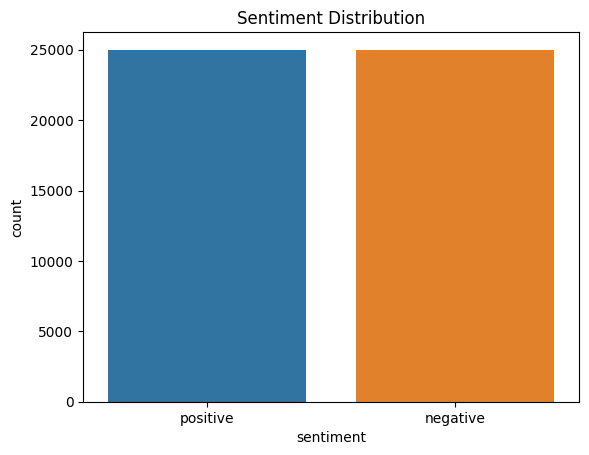

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'sentiment' is the column indicating sentiment labels
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


Analyze Review Length

In [ ]:
# Calculate the length of each review and create a new column
df['review_length'] = df['review'].apply(len)

# Display statistics of review lengths
df['review_length'].describe()


count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review_length, dtype: float64

Visualize Review Length Distribution

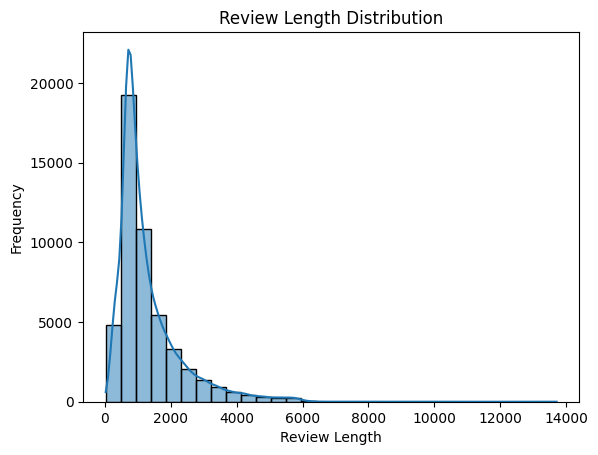

In [ ]:
# Plot the distribution of review lengths
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


Explore Correlations


<ipython-input-18-2be601fda089>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


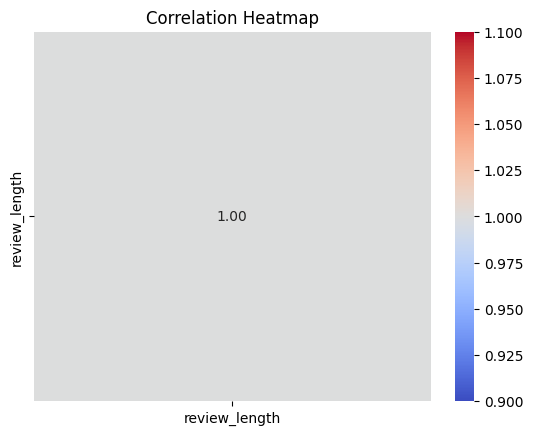

In [ ]:
# Assuming 'sentiment' is a binary column
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Basic Statistical AnalysiS

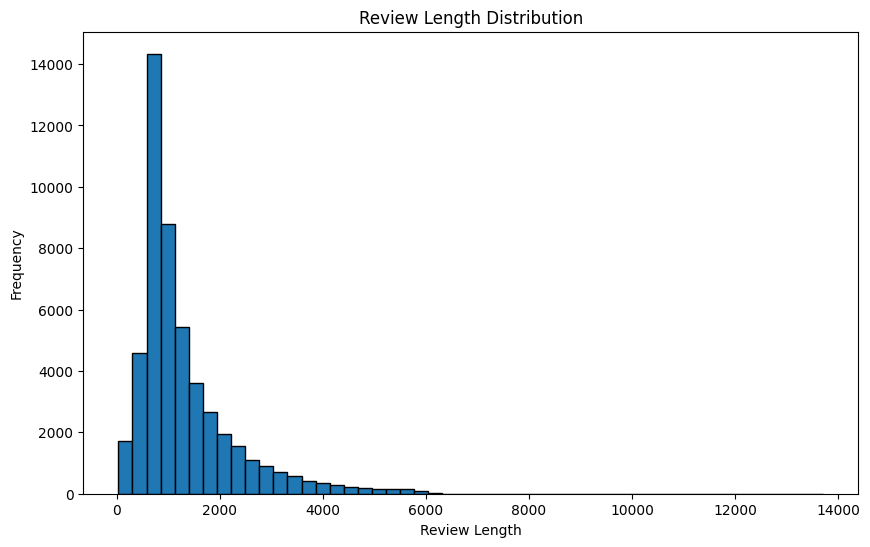

In [ ]:
# Calculate the length of each review
df['review_length'] = df['review'].apply(len)

# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
df['review_length'].plot(kind='hist', bins=50, edgecolor='black')
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


TF-IDF Vectorization

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming the uploaded file is named 'imdb_dataset.csv'
df = pd.read_csv('/content/drive/MyDrive/imdb_dataset.csv')



In [4]:
# Create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the 'cleaned_review' column
X_tfidf = tfidf_vectorizer.fit_transform(df['review']).toarray()

# Convert the TF-IDF matrix to a DataFrame (optional)
tfidf_df = pd.DataFrame(X_tfidf, columns=tfidf_vectorizer.get_feature_names_out())


In [5]:
tfidf_df.head()


,00,000,10,100,11,12,13,13th,14,15,...,you,young,younger,your,yourself,youth,zero,zombie,zombies,zone
0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.059904,0.000000,0.0,0.034407,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.033036,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.071144,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.05866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.062598,0.000000,0.0,0.000000,0.0,0.0,0.0,0.214913,0.0,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


ML ALGORITHM RANDOM FOREST

Test Accuracy (Random Forest): 0.8523
              precision    recall  f1-score   support

    negative       0.84      0.86      0.85      4961
    positive       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



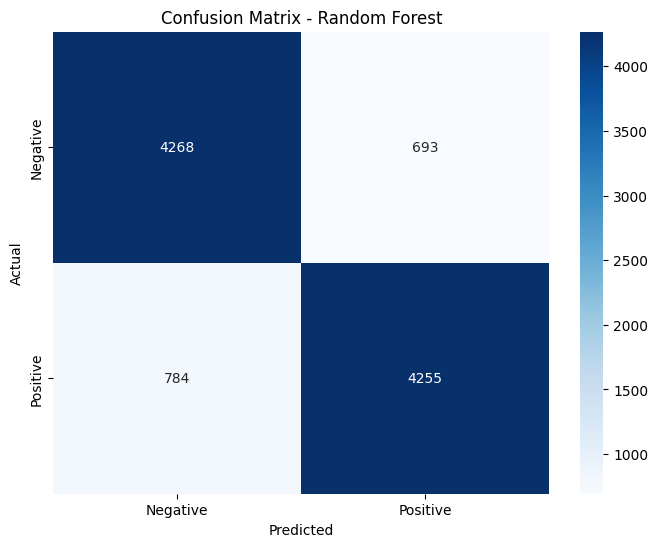

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load IMDb dataset
df = pd.read_csv('/content/drive/MyDrive/imdb_dataset.csv')

# Create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['review']).toarray()

# Split the dataset
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_tfidf, df['sentiment'], test_size=0.2, random_state=42)

# Build a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Predictions
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluate the model
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print(f'Test Accuracy (Random Forest): {accuracy_rf}')

# Classification Report and Confusion Matrix
print(classification_report(y_test_rf, y_pred_rf))
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)

# Visualize the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()
